Code for learning custom neural network model for microorganism recognation

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import Input, GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dirname = os.path.abspath('')
data_dir = pathlib.Path(os.path.join(dirname, 'DBN'))
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

832


In [3]:
batch_size = 32
img_height = 96
img_width = 128

Split images into training and validation

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1488,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 832 files belonging to 7 classes.
Using 666 files for training.
Found 832 files belonging to 7 classes.
Using 166 files for validation.


Class names from folders:

In [5]:
class_names = train_ds.class_names
print(class_names)

['aspergillus', 'bacillus_anthracis', 'bordetella_pertussis', 'cryptococcus', 'neisseria_gonorrhoeae', 'rhizopus_nigricans', 'rhizopus_stolonifer']


In [6]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=32)
val_ds = val_ds.cache().prefetch(buffer_size=32)

CNN model:

In [8]:
num_classes = 7
input_img = Input(shape=(img_height, img_width, 3))

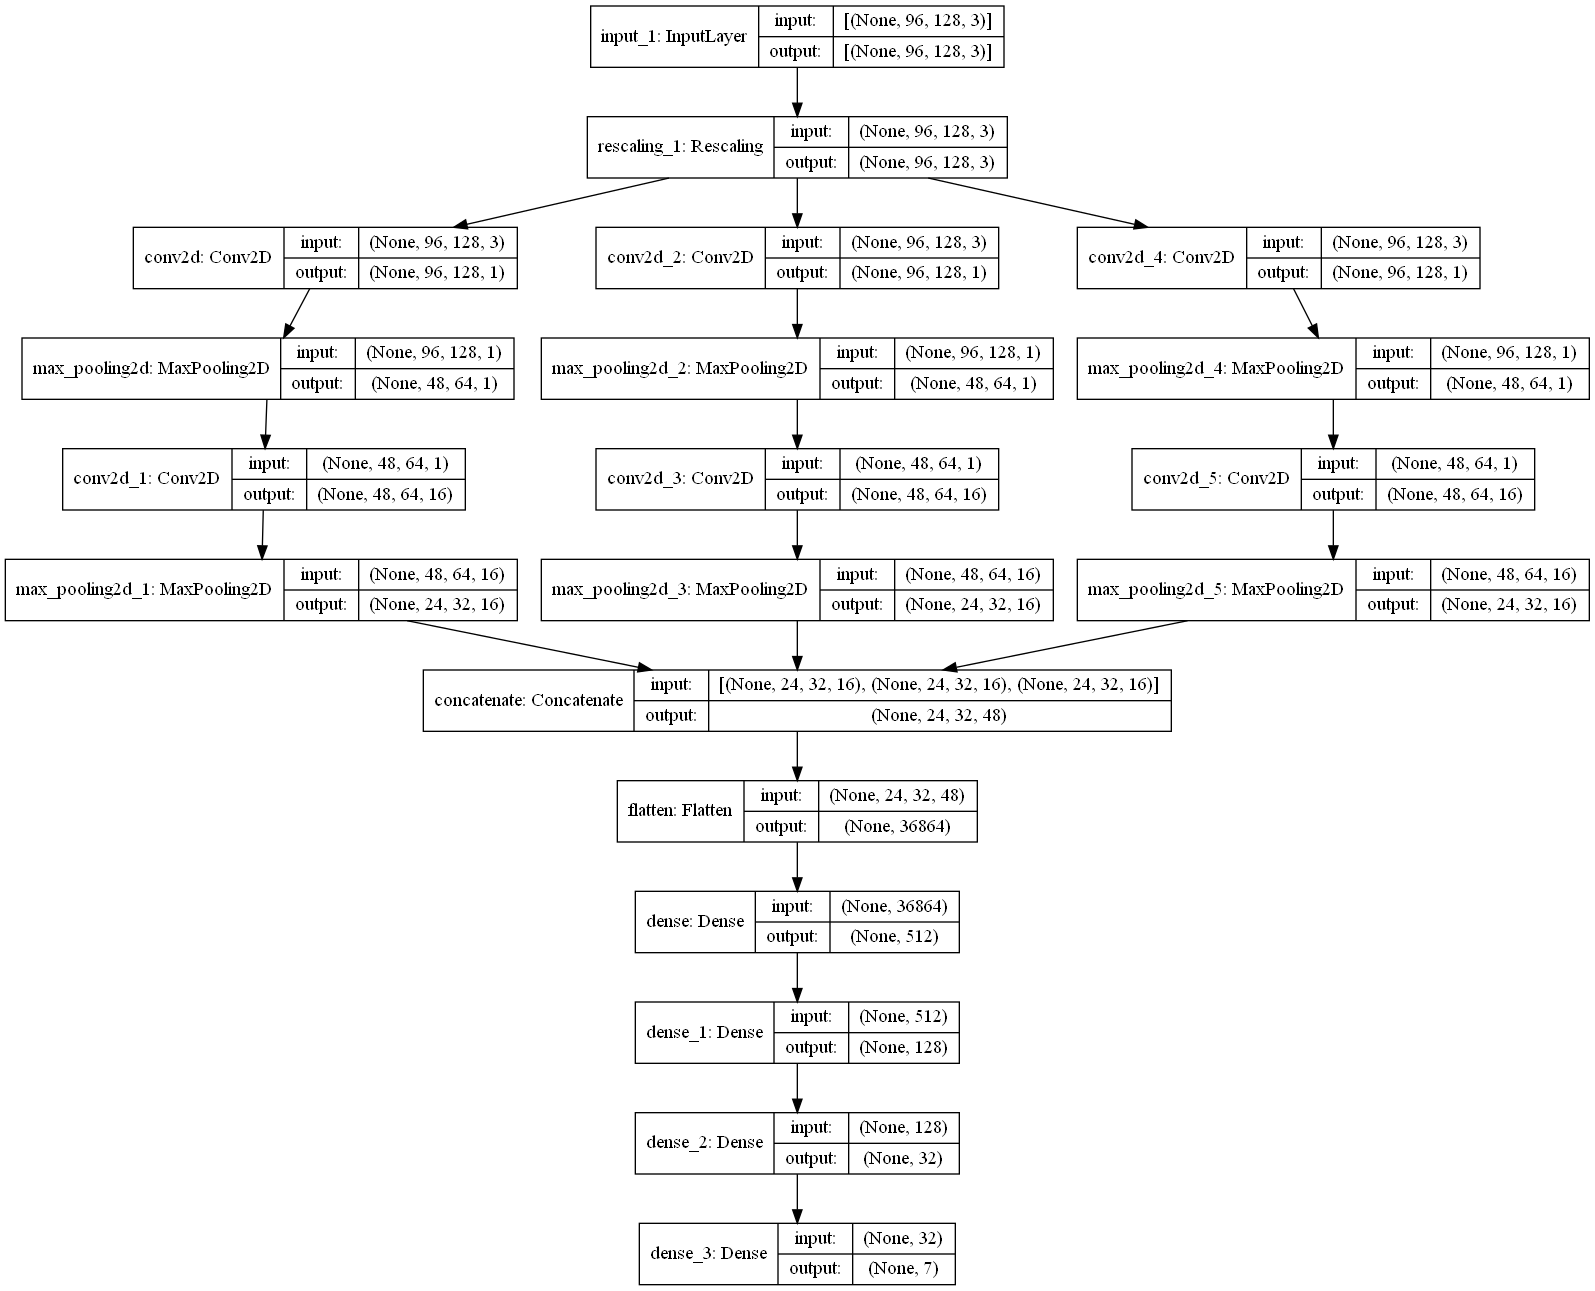

In [9]:
pp = layers.experimental.preprocessing.Rescaling(1./255)(input_img)

layer_1 = Conv2D(1, (1,1), padding='same', activation='relu')(pp)
layer_1 = MaxPooling2D((2,2), padding='same')(layer_1)
layer_1 = Conv2D(16, (3,3), padding='same', activation='relu')(layer_1)
layer_1 = MaxPooling2D((2,2), padding='same')(layer_1)

layer_2 = Conv2D(1, (1,1), padding='same', activation='relu')(pp)
layer_2 = MaxPooling2D((2,2), padding='same')(layer_2)
layer_2 = Conv2D(16, (4,4), padding='same', activation='relu')(layer_2)
layer_2 = MaxPooling2D((2,2), padding='same')(layer_2)

layer_3 = Conv2D(1, (1,1), padding='same', activation='relu')(pp)
layer_3 = MaxPooling2D((2,2), padding='same')(layer_3)
layer_3 = Conv2D(16, (5,5), padding='same', activation='relu')(layer_3)
layer_3 = MaxPooling2D((2,2), padding='same')(layer_3)

mid_1 = layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(512, activation='relu')(flat_1)
dense_2 = Dense(128, activation='relu')(dense_1)
dense_3 = Dense(32, activation='relu')(dense_2)
output = Dense(num_classes, activation='softmax')(dense_3)

model = Model([input_img], output)

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [10]:
model.summary()

model.compile(optimizer='SGD', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

epochs=500
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 128, 3)] 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 96, 128, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 96, 128, 1)   4           rescaling_1[0][0]                
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 96, 128, 1)   4           rescaling_1[0][0]                
______________________________________________________________________________________________

21/21 [==============================] - 0s 9ms/step - loss: 1.4678 - accuracy: 0.4385 - val_loss: 1.4862 - val_accuracy: 0.4036
Epoch 27/500
21/21 [==============================] - 0s 10ms/step - loss: 1.4517 - accuracy: 0.3913 - val_loss: 1.4726 - val_accuracy: 0.4458
Epoch 28/500
21/21 [==============================] - 0s 9ms/step - loss: 1.4564 - accuracy: 0.4364 - val_loss: 1.4291 - val_accuracy: 0.5843
Epoch 29/500
21/21 [==============================] - 0s 9ms/step - loss: 1.4197 - accuracy: 0.4604 - val_loss: 1.4512 - val_accuracy: 0.6084
Epoch 30/500
21/21 [==============================] - 0s 9ms/step - loss: 1.3502 - accuracy: 0.4911 - val_loss: 1.3745 - val_accuracy: 0.5000
Epoch 31/500
21/21 [==============================] - 0s 9ms/step - loss: 1.3110 - accuracy: 0.4788 - val_loss: 1.2979 - val_accuracy: 0.4458
Epoch 32/500
21/21 [==============================] - 0s 9ms/step - loss: 1.3080 - accuracy: 0.4608 - val_loss: 1.2880 - val_accuracy: 0.6084
Epoch 33/500
21/21

Epoch 84/500
21/21 [==============================] - 0s 9ms/step - loss: 0.6319 - accuracy: 0.7523 - val_loss: 0.6438 - val_accuracy: 0.7410
Epoch 85/500
21/21 [==============================] - 0s 9ms/step - loss: 0.5812 - accuracy: 0.7790 - val_loss: 0.6257 - val_accuracy: 0.7831
Epoch 86/500
21/21 [==============================] - 0s 9ms/step - loss: 0.5538 - accuracy: 0.7971 - val_loss: 0.5744 - val_accuracy: 0.8133
Epoch 87/500
21/21 [==============================] - 0s 9ms/step - loss: 0.5008 - accuracy: 0.8305 - val_loss: 0.6151 - val_accuracy: 0.7590
Epoch 88/500
21/21 [==============================] - 0s 9ms/step - loss: 0.6942 - accuracy: 0.7212 - val_loss: 0.6548 - val_accuracy: 0.7289
Epoch 89/500
21/21 [==============================] - 0s 10ms/step - loss: 0.5143 - accuracy: 0.7798 - val_loss: 0.6552 - val_accuracy: 0.7831
Epoch 90/500
21/21 [==============================] - 0s 9ms/step - loss: 0.6600 - accuracy: 0.7563 - val_loss: 0.5582 - val_accuracy: 0.7771
Epoch

21/21 [==============================] - 0s 9ms/step - loss: 0.3509 - accuracy: 0.8488 - val_loss: 0.3068 - val_accuracy: 0.8795
Epoch 142/500
21/21 [==============================] - 0s 10ms/step - loss: 0.2634 - accuracy: 0.9042 - val_loss: 0.3212 - val_accuracy: 0.9337
Epoch 143/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2401 - accuracy: 0.9480 - val_loss: 0.3870 - val_accuracy: 0.8675
Epoch 144/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2626 - accuracy: 0.9050 - val_loss: 0.2986 - val_accuracy: 0.9639
Epoch 145/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2194 - accuracy: 0.9242 - val_loss: 0.4773 - val_accuracy: 0.7831
Epoch 146/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2793 - accuracy: 0.8739 - val_loss: 0.2783 - val_accuracy: 0.9036
Epoch 147/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2364 - accuracy: 0.9129 - val_loss: 0.2989 - val_accuracy: 0.8855
Epoch 148/50

21/21 [==============================] - 0s 9ms/step - loss: 0.1511 - accuracy: 0.9373 - val_loss: 0.2285 - val_accuracy: 0.9217
Epoch 199/500
21/21 [==============================] - 0s 9ms/step - loss: 0.1086 - accuracy: 0.9655 - val_loss: 0.1919 - val_accuracy: 0.9518
Epoch 200/500
21/21 [==============================] - 0s 9ms/step - loss: 0.1125 - accuracy: 0.9559 - val_loss: 0.3902 - val_accuracy: 0.8614
Epoch 201/500
21/21 [==============================] - 0s 9ms/step - loss: 0.1183 - accuracy: 0.9525 - val_loss: 0.2020 - val_accuracy: 0.9277
Epoch 202/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0982 - accuracy: 0.9647 - val_loss: 0.3089 - val_accuracy: 0.8795
Epoch 203/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.3306 - val_accuracy: 0.8795
Epoch 204/500
21/21 [==============================] - 0s 9ms/step - loss: 0.2291 - accuracy: 0.9108 - val_loss: 0.3588 - val_accuracy: 0.8916
Epoch 205/500

21/21 [==============================] - 0s 9ms/step - loss: 0.1084 - accuracy: 0.9589 - val_loss: 0.1714 - val_accuracy: 0.9578
Epoch 256/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 0.2859 - val_accuracy: 0.9036
Epoch 257/500
21/21 [==============================] - 0s 9ms/step - loss: 0.1185 - accuracy: 0.9530 - val_loss: 0.1727 - val_accuracy: 0.9578
Epoch 258/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.1573 - val_accuracy: 0.9699
Epoch 259/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0522 - accuracy: 0.9863 - val_loss: 0.1601 - val_accuracy: 0.9759
Epoch 260/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0699 - accuracy: 0.9776 - val_loss: 0.1807 - val_accuracy: 0.9639
Epoch 261/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0972 - accuracy: 0.9671 - val_loss: 0.1963 - val_accuracy: 0.9398
Epoch 262/500

21/21 [==============================] - 0s 10ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.5211 - val_accuracy: 0.8434
Epoch 313/500
21/21 [==============================] - 0s 10ms/step - loss: 0.2177 - accuracy: 0.9084 - val_loss: 0.1621 - val_accuracy: 0.9639
Epoch 314/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0748 - accuracy: 0.9734 - val_loss: 0.1570 - val_accuracy: 0.9759
Epoch 315/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0714 - accuracy: 0.9806 - val_loss: 0.1621 - val_accuracy: 0.9639
Epoch 316/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.1728 - val_accuracy: 0.9639
Epoch 317/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.3748 - val_accuracy: 0.9096
Epoch 318/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0783 - accuracy: 0.9761 - val_loss: 0.1658 - val_accuracy: 0.9759
Epoch 319/5

21/21 [==============================] - 0s 9ms/step - loss: 0.9354 - accuracy: 0.7890 - val_loss: 0.1654 - val_accuracy: 0.9639
Epoch 370/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0717 - accuracy: 0.9760 - val_loss: 0.1370 - val_accuracy: 0.9759
Epoch 371/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0587 - accuracy: 0.9833 - val_loss: 0.1314 - val_accuracy: 0.9759
Epoch 372/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0447 - accuracy: 0.9915 - val_loss: 0.1232 - val_accuracy: 0.9759
Epoch 373/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0469 - accuracy: 0.9839 - val_loss: 0.1316 - val_accuracy: 0.9759
Epoch 374/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 0.9958 - val_loss: 0.1713 - val_accuracy: 0.9518
Epoch 375/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0871 - accuracy: 0.9724 - val_loss: 0.1399 - val_accuracy: 0.9759
Epoch 376/500

21/21 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.9941 - val_loss: 0.1438 - val_accuracy: 0.9699
Epoch 427/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0205 - accuracy: 0.9960 - val_loss: 0.1662 - val_accuracy: 0.9699
Epoch 428/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9958 - val_loss: 0.1392 - val_accuracy: 0.9759
Epoch 429/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9759
Epoch 430/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.1963 - val_accuracy: 0.9458
Epoch 431/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0919 - accuracy: 0.9618 - val_loss: 0.1360 - val_accuracy: 0.9759
Epoch 432/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.9973 - val_loss: 0.1276 - val_accuracy: 0.9759
Epoch 433/500

21/21 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9909 - val_loss: 0.1351 - val_accuracy: 0.9699
Epoch 484/500
21/21 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9699
Epoch 485/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9759
Epoch 486/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9699
Epoch 487/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9699
Epoch 488/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1359 - val_accuracy: 0.9699
Epoch 489/500
21/21 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1347 - val_accuracy: 0.9699
Epoch 490/50

Plot training/validation accuracy and loss

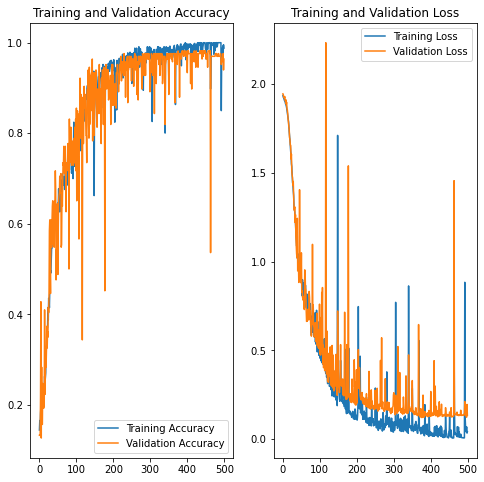

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()